# Design of Experiments (DoE) Examples: Using PyDOE

In [1]:
import numpy as np
import pandas as pd
from pyDOE2 import *  # Note: pyDOE doesn't with with Python 3
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [2]:
from platform import python_version
python_version()

'3.7.4'

In [3]:
# Convenience function
def plot_design(design):
    n = len(design)
    ax = plt.figure(figsize=(max(3, n//2), 3)).gca()
    pd.DataFrame(design).plot(ax=ax, style='o-', grid=True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Sample #')
    plt.legend(title='Parameter', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# 1. Factorial Designs

Use when the factors have discrete values or if you are only interested in linear effects.

## General Full-Factorial Design

Say you have two factors (parameters) you want to vary in an experiment. Factor 1 has 2 possible values and parameter 2 has 3.

In [4]:
# Find all possible combinations of parameter values
fullfact([2, 3])

array([[0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 2.],
       [1., 2.]])

For many experiments, each factor has only two levels.

In [5]:
ff2n(3)  # Equivalent to fullfact([2, 2, 2])

array([[-1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [ 1.,  1., -1.],
       [-1., -1.,  1.],
       [ 1., -1.,  1.],
       [-1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In practical experiments we may not be able to run all combinations so a fractional-factoral design is used

In [6]:
# Fractional factorial with 3 factors
design = fracfact('a b ab')
design

array([[-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [ 1.,  1.,  1.]])

`'a b ab'` means "the main effect of factor C is confounded with the interaction effect of the product AB."
The levels in the C column are created from the product of the A and B columns.

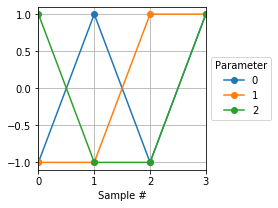

In [7]:
plot_design(design)

### Plackett-Burman designs

Another way to generate fractional-factorial designs

In [8]:
design = pbdesign(3)
design

array([[-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [ 1.,  1.,  1.]])

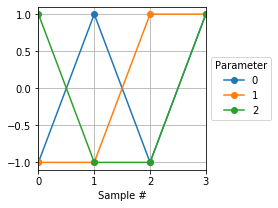

In [9]:
plot_design(design)

## 2. Response Surface Designs

Use to generate higher-order (i.e. non-linear) response surfaces where the factor variables have continuous (i.e. not discrete) values.

### Box-Behnken Designs

Uses a minimum, intermediate, and maximum value for each variable, labelled −1, 0, and +1.

In [10]:
design = bbdesign(3, center=3)
design

array([[-1., -1.,  0.],
       [ 1., -1.,  0.],
       [-1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [-1.,  0., -1.],
       [ 1.,  0., -1.],
       [-1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 0., -1., -1.],
       [ 0.,  1., -1.],
       [ 0., -1.,  1.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

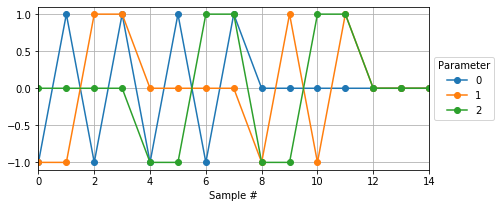

In [11]:
plot_design(design)

The `center` argument specifies the number of centre-points to include.  It is good practice to include at least two (usually executed at the beginning and end of the sequence) to test for any non-stationarity or unobserved disturbances in the experiments.

### Central Composite Design

In [12]:
design = ccdesign(2, center=(4, 4))
design

array([[-1.        , -1.        ],
       [ 1.        , -1.        ],
       [-1.        ,  1.        ],
       [ 1.        ,  1.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-1.41421356,  0.        ],
       [ 1.41421356,  0.        ],
       [ 0.        , -1.41421356],
       [ 0.        ,  1.41421356],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

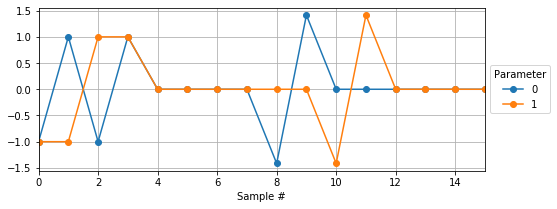

In [13]:
plot_design(design)

## 3. Randomized Designs

### Latin Hypercube Designs

```
lhs(n, [samples, criterion, iterations])
```
- `n` (int): number of factors (required)
- `samples` (int): number of sample points for each factor (default: n)
- `criterion` (string): Sample method (default: `None`)

 - `None`: Randomize the points within the intervals
 - `center` or `c`: center the points within the intervals
 - `maximin` or `m`: maximize the minimum distance between points, but place the point in a randomized location within its interval
 - `centermaximin` or `cm`: same as maximin, but centered within the intervals
 - `correlation` or `corr`: minimize the maximum correlation coefficient.

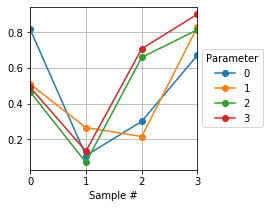

In [14]:
design = lhs(4)
plot_design(design)

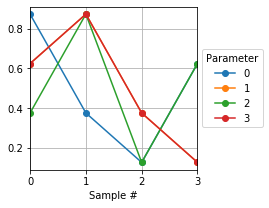

In [15]:
design = lhs(4, criterion='center')
plot_design(design)

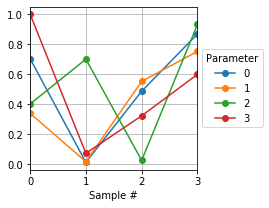

In [16]:
design = lhs(4, criterion='maximin')
plot_design(design)

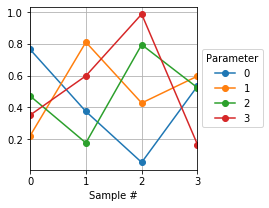

In [17]:
design = lhs(4, criterion='correlation')
plot_design(design)

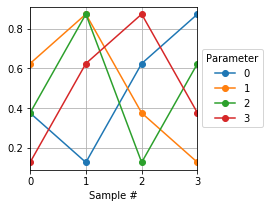

In [18]:
design = lhs(4, criterion='centermaximin')
plot_design(design)